<a href="https://colab.research.google.com/github/JScottLopez/github-ds/blob/master/TIM_6500_JSLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Conditions Related to COVID-19 Deaths

By: Joseph S. Lopez

TIM-6500 v3: Princples of Data Science

August 15, 2021

In [162]:
#import necessary Python libraries
import pandas as pd

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [ ]:
#used describe function for data exploration
#df.describe(include = 'all')

In [ ]:
#determine data types for each column
#df.dtypes

#count null values for all columns
#df.isnull().sum(axis = 0)

In [163]:
#rename columns for later use
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,ConditionGroup,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [164]:
#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)
df.dropna(subset = ["Year"], inplace=True)
df.dropna(subset = ["Month"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

df = df.reset_index(drop=True)

#drop non-relevant columns
df.drop(['Data As Of', 'Start Date', 'End Date', 'ConditionGroup', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
df = df[~df.State.str.contains('District of Columbia|New York City|Puerto Rico|United States', regex=True)]
#remove all non-relevant values from AgeGroup column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]
#remove all non-relevant values from Group column
df = df[~df.Group.str.contains('By Year|By Total', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

df = df.reset_index(drop=True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')
df['Year']=df['Year'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')
df['Year'] = df['Year'].astype(int, errors = 'raise')
df['Month'] = df['Month'].astype(int, errors = 'raise')

#combine Year and Month into one column
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('0-24','12.0')
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

#replace condition with ICD numerical codes?

display(df)

,Group,Year,Month,State,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Date
0,By Month,2021,1,Alabama,Influenza and pneumonia,J09-J18,39.5,18.0,2021-01-01
1,By Month,2020,6,Alabama,Influenza and pneumonia,J09-J18,49.5,11.0,2020-06-01
2,By Month,2020,7,Alabama,Influenza and pneumonia,J09-J18,49.5,10.0,2020-07-01
3,By Month,2020,8,Alabama,Influenza and pneumonia,J09-J18,49.5,17.0,2020-08-01
4,By Month,2020,11,Alabama,Influenza and pneumonia,J09-J18,49.5,14.0,2020-11-01
...,...,...,...,...,...,...,...,...,...
27785,By Month,2020,10,Wyoming,COVID-19,U071,85.0,30.0,2020-10-01
27786,By Month,2020,11,Wyoming,COVID-19,U071,85.0,56.0,2020-11-01
27787,By Month,2020,12,Wyoming,COVID-19,U071,85.0,55.0,2020-12-01
27788,By Month,2021,1,Wyoming,COVID-19,U071,85.0,33.0,2021-01-01


In [ ]:
#import numpy as np

#table = df.pivot_table(index='Condition', columns='State', values='CV19_Deaths', aggfunc=np.sum, fill_value = 0)
#display(table)

#import numpy as np

#table2 = df.pivot_table(index='Condition', columns='AgeGroup', values='CV19_Deaths', fill_value = 0)
#display(table)

#pd.set_option('precision', 0)
#df_single_level_cols = df.pivot_table(index=['Condition'],columns=['State','AgeGroup'], values='CV19_Deaths',fill_value = 0)
#df_single_level_cols.stack()
#display(df_single_level_cols)

#df.hist(column='CV19_Deaths', bins=[0,10,20,30,40,50,60,70,80,90,100]);

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Condition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adult respiratory distress syndrome,390,0,2390,616,5956,1211,280,10,2980,1292,0,95,612,842,280,183,477,1974,0,716,970,994,734,833,677,0,88,2388,0,3402,173,3504,828,42,2009,259,105,1967,230,809,86,837,4862,299,0,690,626,181,201,0
Alzheimer disease,168,0,372,215,2696,366,174,45,792,472,0,46,587,621,331,103,207,168,11,131,314,507,631,147,458,12,58,23,11,403,60,463,443,92,968,341,135,957,72,158,136,320,1711,78,0,192,328,50,428,0
COVID-19,10825,178,15946,6043,65426,6961,8161,1546,35494,17929,292,2034,22450,13583,6014,4878,7537,9625,833,10283,13499,18477,7617,7580,11279,1504,2783,5715,1216,24529,4041,25296,13970,1508,22986,8500,2596,28441,2565,9142,1837,13219,55829,2360,116,11090,5598,2802,8180,519
Cardiac arrest,1422,0,1666,498,18613,163,902,0,2732,2403,0,0,533,658,225,296,329,389,0,207,1610,903,76,685,371,0,98,1161,12,5090,136,5983,1113,21,1896,354,0,1880,108,584,18,779,3622,14,0,189,221,54,45,0
Cardiac arrhythmia,507,0,816,283,4625,492,387,27,2493,740,0,71,1679,1211,412,223,698,397,10,901,744,938,821,345,631,69,247,146,53,1552,34,1377,807,69,1426,651,145,2437,94,839,105,863,4403,65,0,584,355,107,786,24
Cerebrovascular diseases,265,0,384,123,3164,305,204,22,1716,633,0,51,787,638,201,126,265,335,0,608,384,728,466,247,437,10,89,61,18,900,22,769,540,34,1122,397,67,1398,34,384,58,567,2490,15,0,327,139,13,416,0
Chronic lower respiratory diseases,632,0,985,397,4170,669,650,0,4381,974,0,122,2753,1580,510,325,798,561,0,899,912,1402,918,592,741,176,238,228,72,1233,184,1630,998,123,1898,1054,148,2355,167,756,172,1048,3946,80,0,627,399,204,1124,41
Diabetes,960,0,2196,659,14561,901,706,93,6882,1990,0,162,5517,1935,744,425,1266,1344,0,1809,994,1894,1351,1233,921,202,331,576,58,2467,506,2271,1501,122,2467,2014,252,3225,170,1038,264,1614,11045,185,0,968,796,207,1565,10
Heart failure,522,0,682,327,4298,500,614,24,1812,1031,0,114,2110,1177,483,263,702,543,11,669,1067,1213,919,645,685,50,203,142,40,1277,52,1413,937,128,1738,687,183,2373,189,725,164,778,3955,125,0,672,443,149,953,0


In [ ]:
#%matplotlib inline
#import matplotlib.pyplot as plt

#from scipy import stats
#from scipy.stats import norm, skew

#import seaborn as sns
#color = sns.color_palette()
#sns.set_style('darkgrid')

#import warnings
#def ignore_warn(*args, **kwargs):
#  pass
#warnings.warn = ignore_warn

#corrmat = table2.corr(method="kendall")
#f, ax = plt.subplots(figsize=(5,4))
#sns.heatmap(corrmat, square=True)

#print(table2)
#print(table2.corr(method='kendall'))


KeyError: ignored

In [49]:
#find a way to stack the dummy variable columns and then find a way to use corr for the 3 variables CVDeaths, AgeGroup(stacked) and Condition(Stacked)

#pd.set_option('precision', 0)
#df_single_level_cols = ndf.pivot_table(index=['Condition'],columns=['Condition','AgeGroup'], values='CV19_Deaths',fill_value = 0)
#df_single_level_cols.stack()
#display(df_single_level_cols)

#s2 = pd.Series(dummies.columns[np.where(dummies!=0)[1]])

KeyError: ignored

In [157]:
#searches for correlation in AgeGroup columns of dataframe
import numpy as np

agegrp = pd.get_dummies(df, columns=['AgeGroup'])
#display(agegrp)
print(agegrp.corr().abs().nlargest(3, 'CV19_Deaths').index)
print(agegrp.corr().abs().nlargest(3, 'CV19_Deaths').values[:4])

Index(['CV19_Deaths', 'AgeGroup_49.5', 'AgeGroup_85.0'], dtype='object')
[[0.00230832 0.01068332 1.         0.00942955 0.02408035 0.03841136
  0.04743911 0.03633644 0.0045324  0.02896387 0.04440575]
 [0.02362052 0.01556111 0.04743911 0.00830434 0.02437953 0.04471419
  1.         0.11905771 0.15122641 0.16340691 0.15986471]
 [0.04850735 0.02738155 0.04440575 0.01733364 0.05088734 0.09333184
  0.15986471 0.24850891 0.31565456 0.34107888 1.        ]]


Text(0, 0.5, 'CV19_Deaths')

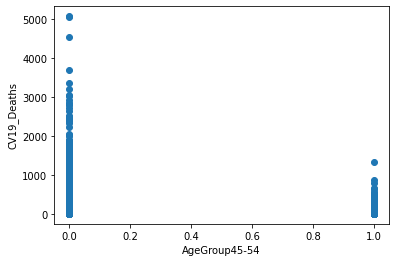

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(agegrp['AgeGroup_45-54'], agegrp['CV19_Deaths'], marker='o')
plt.xlabel('AgeGroup45-54')
plt.ylabel('CV19_Deaths')

Text(0, 0.5, 'CV19_Deaths')

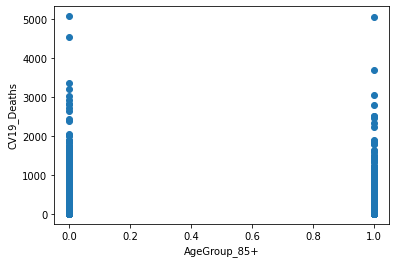

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(agegrp['AgeGroup_85+'], agegrp['CV19_Deaths'], marker='o')
plt.xlabel('AgeGroup_85+')
plt.ylabel('CV19_Deaths')

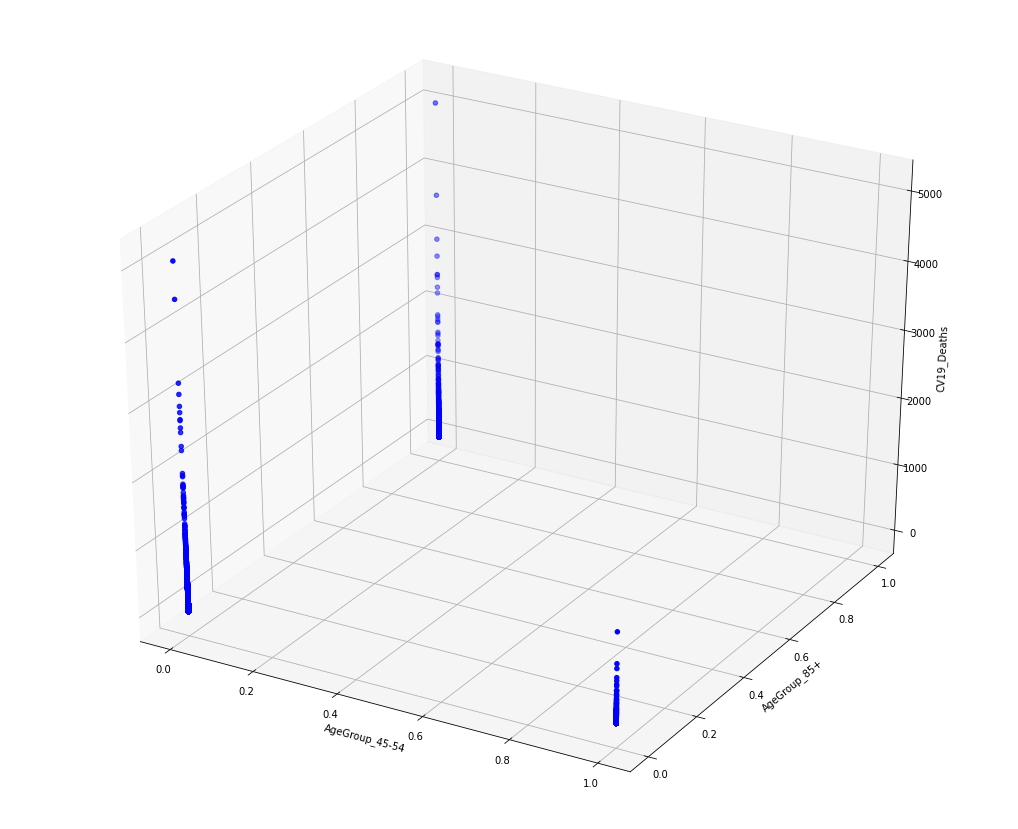

In [112]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(agegrp['AgeGroup_45-54'],
          agegrp['AgeGroup_85+'],
          agegrp['CV19_Deaths'],
          c='b')

ax.set_xlabel("AgeGroup_45-54")
ax.set_ylabel("AgeGroup_85+")
ax.set_zlabel("CV19_Deaths")
plt.show()

In [119]:
#Train the AgeGroup Model
#Create DataFrames to train model
x = pd.DataFrame(np.c_[agegrp['AgeGroup_45-54'], agegrp['AgeGroup_85+']], columns = ['AgeGroup_45-54','AgeGroup_85+'])
Y = agegrp['CV19_Deaths']

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state=5)

#print train set
print(x_train.shape)
print(Y_train.shape)

(19453, 2)
(19453,)


In [120]:
#print test shape
print(x_test.shape)
print(Y_test.shape)

(8337, 2)
(8337,)


In [121]:
#train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
#make age prediction
age_pred = model.predict(x_test)

print('R-Squared: %.4f' % model.score(x_test,Y_test))

R-Squared: 0.0047


In [124]:
#show actual age vs predicted age
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, age_pred)
print(mse)

17830.810334019046


Text(0.5, 1.0, 'Actual Age vs Predicted Age')

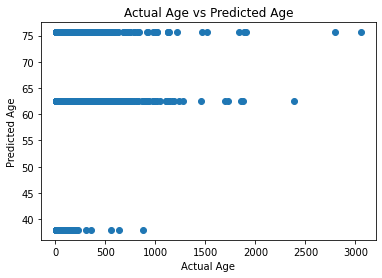

In [125]:
plt.scatter(Y_test, age_pred)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual Age vs Predicted Age")

In [113]:
#searches for correlation in Condition columns of dataframe
import numpy as np

cond = pd.get_dummies(df, columns=['Condition'])

#corr2 = cond.corr()
#display(corr2)


print(cond.corr().abs().nlargest(3, 'CV19_Deaths').index)
print(cond.corr().abs().nlargest(3, 'CV19_Deaths').values[:4])

Index(['CV19_Deaths', 'Condition_COVID-19',
       'Condition_Influenza and pneumonia'],
      dtype='object')
[[0.00230832 0.01068332 1.         0.04356531 0.02839997 0.23830134
  0.01947078 0.03414267 0.04144818 0.0391513  0.02428916 0.03819321
  0.00822937 0.06660305 0.02939987 0.03050623 0.04304244 0.03615794
  0.04458989 0.04147539 0.03743531 0.02797341 0.04330228 0.03819597
  0.01360808]
 [0.02103312 0.01835847 0.23830134 0.087276   0.05279459 1.
  0.08000299 0.07356366 0.06588486 0.08173915 0.09666994 0.07680333
  0.09856196 0.12532155 0.03846396 0.08444191 0.06499236 0.05556741
  0.07428975 0.06080997 0.08542893 0.0399005  0.11924185 0.08409938
  0.07271518]
 [0.01998532 0.01243677 0.06660305 0.07497394 0.04535288 0.12532155
  0.0687261  0.06319443 0.056598   0.07021754 0.08304375 0.06597745
  0.08466908 1.         0.03304224 0.07253933 0.05583131 0.04773486
  0.06381817 0.05223845 0.07338722 0.0342763  0.10243401 0.07224508
  0.06246555]]


Text(0, 0.5, 'CV19_Deaths')

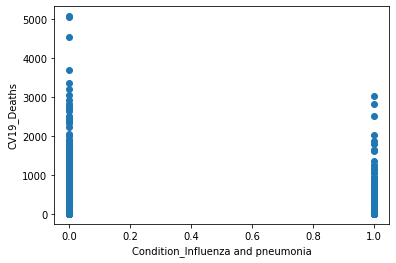

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(cond['Condition_Influenza and pneumonia'], cond['CV19_Deaths'], marker='o')
plt.xlabel('Condition_Influenza and pneumonia')
plt.ylabel('CV19_Deaths')

Text(0, 0.5, 'CV19_Deaths')

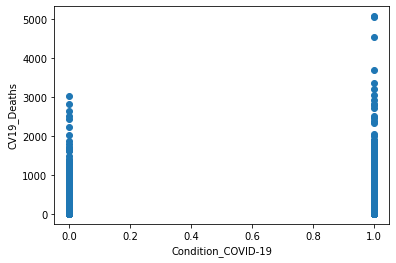

In [115]:
#-----2D representation of linear model
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(cond['Condition_COVID-19'], cond['CV19_Deaths'], marker='o')
plt.xlabel('Condition_COVID-19')
plt.ylabel('CV19_Deaths')


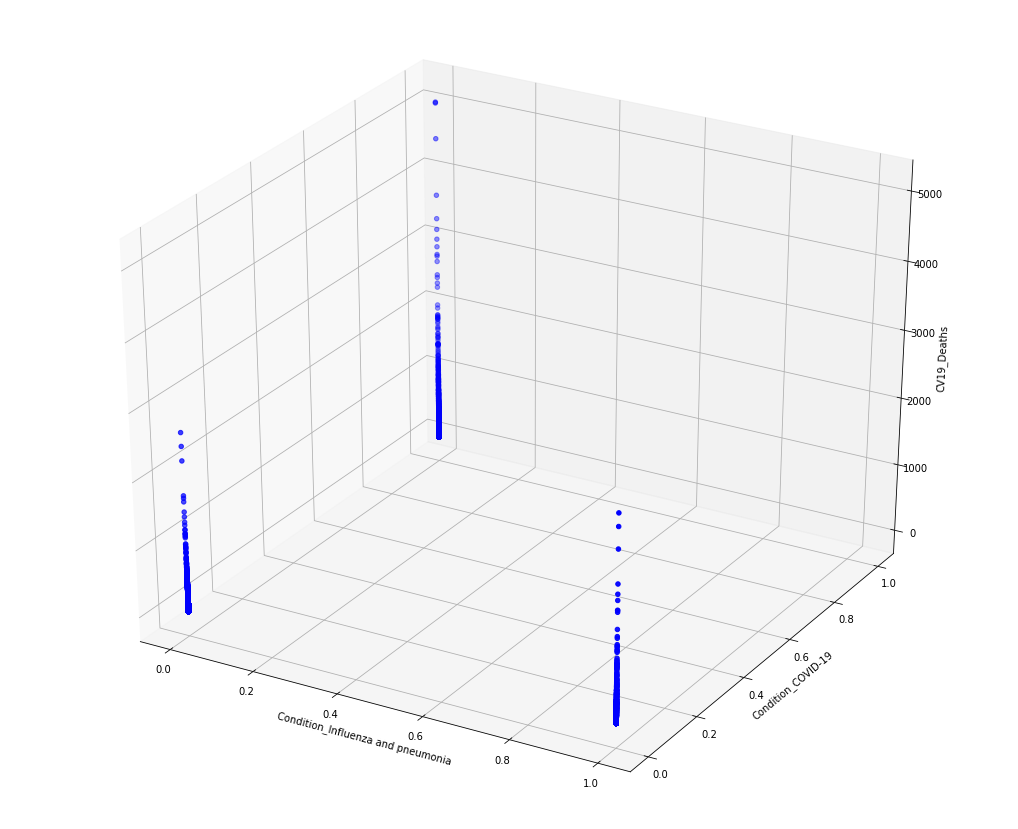

In [116]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cond['Condition_Influenza and pneumonia'],
          cond['Condition_COVID-19'],
          cond['CV19_Deaths'],
          c='b')

ax.set_xlabel("Condition_Influenza and pneumonia")
ax.set_ylabel("Condition_COVID-19")
ax.set_zlabel("CV19_Deaths")
plt.show()

In [156]:
#combined dataframe using float values for Age Group and maybe condition?
#corr = df.corr()
#print(corr)

print(df.corr().abs().nlargest(3, 'CV19_Deaths').index)
print(df.corr().abs().nlargest(3, 'CV19_Deaths').values[:13])


Index(['CV19_Deaths', 'AgeGroup', 'Month'], dtype='object')
[[0.00230832 0.01068332 0.084882   1.        ]
 [0.05626561 0.03970337 1.         0.084882  ]
 [0.74304647 1.         0.03970337 0.01068332]]


In [107]:
#combined dataframe

import numpy as np
#corr1 = agecond.corr()
#display(corr1)


agegrp = pd.get_dummies(df, columns=['AgeGroup'])
agecond = pd.get_dummies(agegrp, columns=['Condition'])

print(agecond.corr().abs().nlargest(3, 'CV19_Deaths').index)
print(agecond.corr().abs().nlargest(3, 'CV19_Deaths').values[:4])

Index(['CV19_Deaths', 'Condition_COVID-19',
       'Condition_Influenza and pneumonia'],
      dtype='object')
[[0.00230832 0.01068332 1.         0.00942955 0.02408035 0.03841136
  0.04743911 0.03633644 0.0045324  0.02896387 0.04440575 0.04356531
  0.02839997 0.23830134 0.01947078 0.03414267 0.04144818 0.0391513
  0.02428916 0.03819321 0.00822937 0.06660305 0.02939987 0.03050623
  0.04304244 0.03615794 0.04458989 0.04147539 0.03743531 0.02797341
  0.04330228 0.03819597 0.01360808]
 [0.02103312 0.01835847 0.23830134 0.04615409 0.08861698 0.11997536
  0.09294006 0.02125294 0.03374288 0.05637022 0.04790557 0.087276
  0.05279459 1.         0.08000299 0.07356366 0.06588486 0.08173915
  0.09666994 0.07680333 0.09856196 0.12532155 0.03846396 0.08444191
  0.06499236 0.05556741 0.07428975 0.06080997 0.08542893 0.0399005
  0.11924185 0.08409938 0.07271518]
 [0.01998532 0.01243677 0.06660305 0.01041424 0.0308516  0.04110801
  0.06041701 0.02649667 0.01647386 0.03197374 0.03163228 0.07497394
  0.0

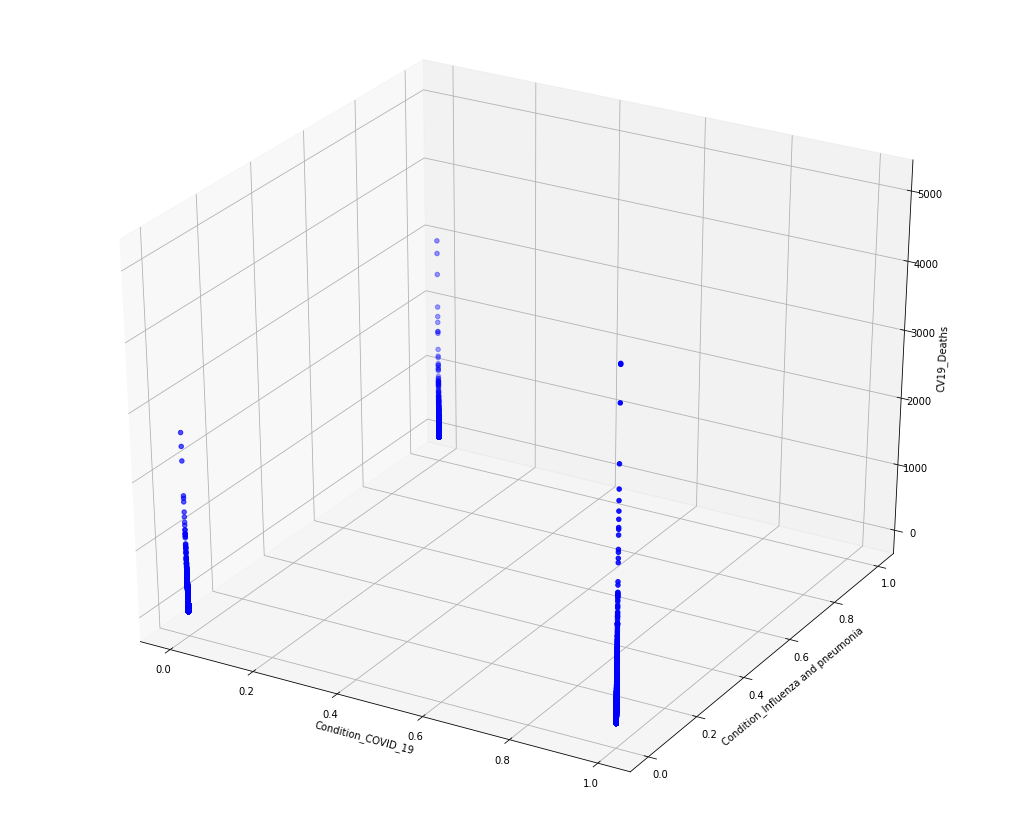

In [108]:
#full data frame with dummy colums
import numpy as np

%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(agecond['Condition_COVID-19'],
          agecond['Condition_Influenza and pneumonia'],
          agecond['CV19_Deaths'],
          c='b')


ax.set_xlabel("Condition_COVID_19")
ax.set_ylabel("Condition_Influenza and pneumonia")
ax.set_zlabel("CV19_Deaths")
plt.show()


In [ ]:
#Train the combined model
x = pd.DataFrame(np.c_[agecond['Condition_COVID-19'], agecond['Condition_Influenza and pneumonia']], columns = ['',''])